BỘ LỌC THÔNG THẤP

In [2]:
import numpy as np

def ideal_lowpass_filter(size, cutoff):
    """Tạo bộ lọc lý tưởng (Ideal) thông thấp."""
    rows, cols = size
    center = (int(rows / 2), int(cols / 2))
    filter_matrix = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            if distance <= cutoff:
                filter_matrix[i, j] = 1
    return filter_matrix

def circular_lowpass_filter(size, cutoff):
    """Tạo bộ lọc tròn thông thấp."""
    rows, cols = size
    center = (int(rows / 2), int(cols / 2))
    filter_matrix = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            filter_matrix[i, j] = 1 / (1 + (distance / cutoff) ** 2)
    return filter_matrix

def gaussian_lowpass_filter(size, cutoff):
    """Tạo bộ lọc Gaussian thông thấp."""
    rows, cols = size
    center = (int(rows / 2), int(cols / 2))
    filter_matrix = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            filter_matrix[i, j] = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return filter_matrix

def butterworth_lowpass_filter(size, cutoff, order=2):
    """Tạo bộ lọc Butterworth thông thấp."""
    rows, cols = size
    center = (int(rows / 2), int(cols / 2))
    filter_matrix = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            filter_matrix[i, j] = 1 / (1 + (distance / cutoff) ** (2 * order))
    return filter_matrix


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_filter_response(filter_matrix, title):
    """Hiển thị đáp ứng của bộ lọc dưới dạng 2D và 3D."""
    plt.figure(figsize=(12, 5))

    # Hiển thị đáp ứng 2D
    plt.subplot(1, 2, 1)
    plt.imshow(filter_matrix, cmap='gray')
    plt.title(f'2D Response - {title}')
    plt.colorbar()

    # Hiển thị đáp ứng 3D
    ax = plt.subplot(1, 2, 2, projection='3d')
    X, Y = np.meshgrid(range(filter_matrix.shape[1]), range(filter_matrix.shape[0]))
    ax.plot_surface(X, Y, filter_matrix, cmap='viridis')
    ax.set_title(f'3D Response - {title}')
    plt.show()


In [4]:
import numpy as np

def apply_filter(image, filter_matrix):
    """Áp dụng bộ lọc lên ảnh và trả về ảnh đã lọc."""
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    filtered_dft = dft_shift * filter_matrix
    inverse_dft = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(inverse_dft)
    return np.abs(filtered_image)


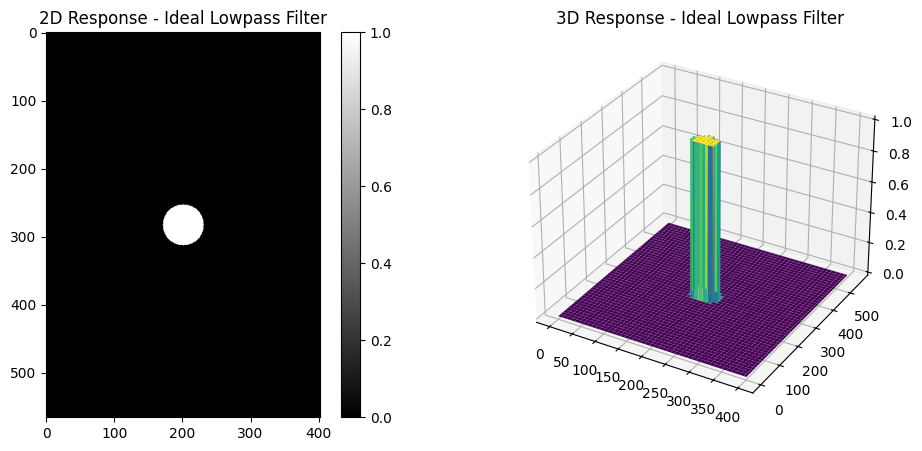

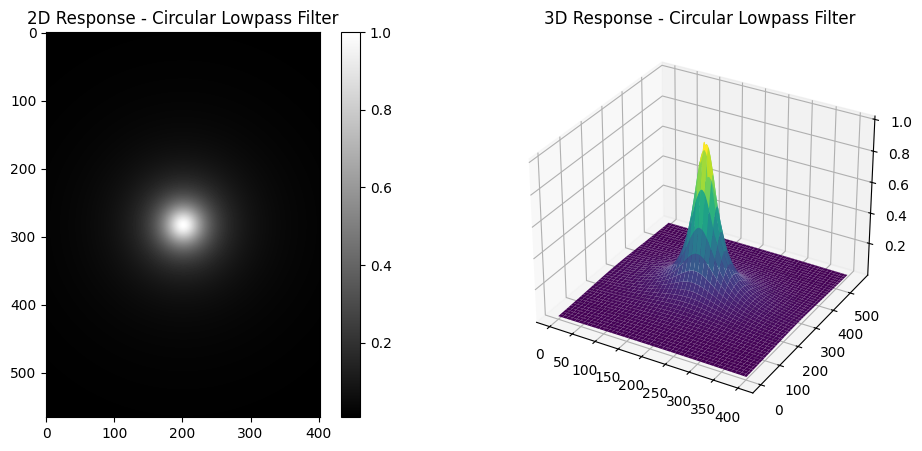

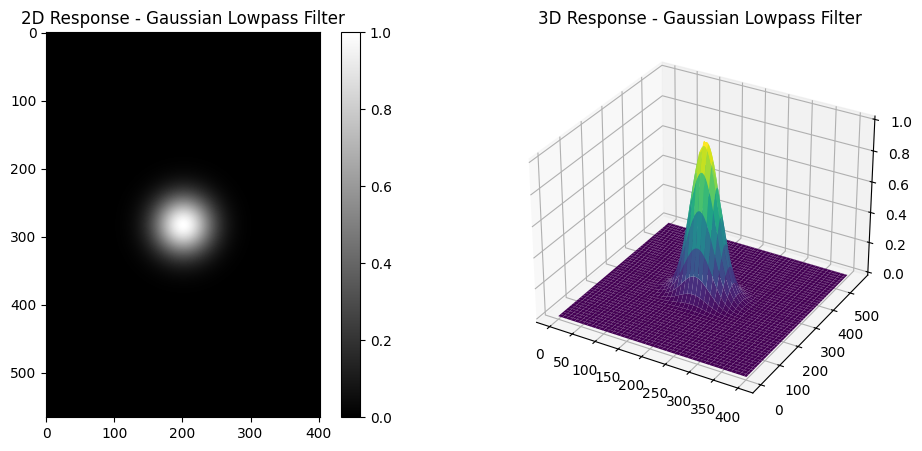

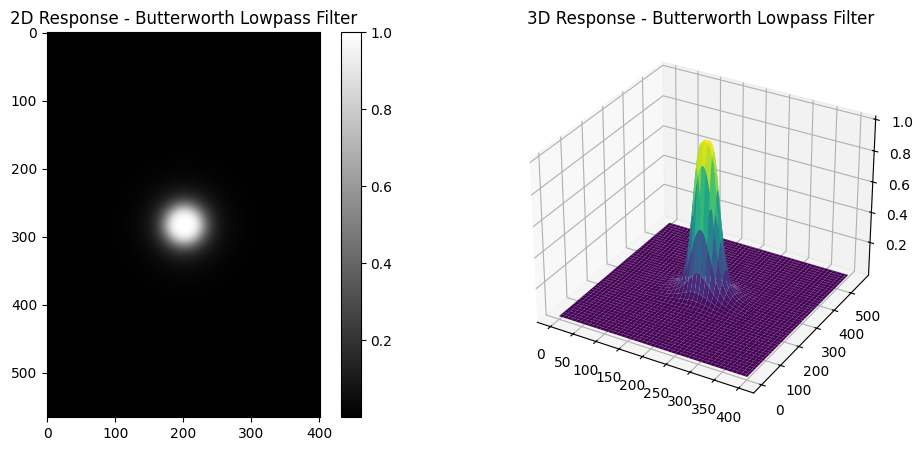

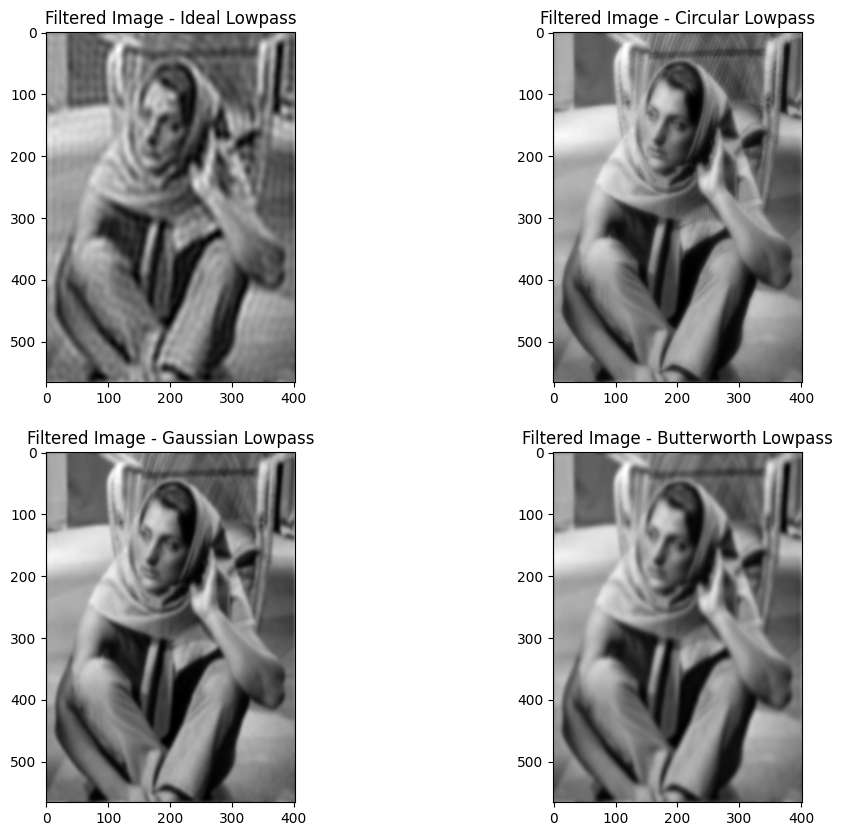

In [7]:
import cv2
import matplotlib.pyplot as plt

def main():
    # Đường dẫn đến file ảnh đã tải lên
    image_path = '/content/Fig0417(a)(barbara).png'

    # Đọc ảnh ở chế độ grayscale
    image = cv2.imread(image_path, 0)
    if image is None:
        print("Error: Could not load image. Please check the file path.")
        return

    image_size = image.shape
    cutoff_frequency = 30

    # Khởi tạo các bộ lọc
    ideal_filter = ideal_lowpass_filter(image_size, cutoff_frequency)
    circular_filter = circular_lowpass_filter(image_size, cutoff_frequency)
    gaussian_filter = gaussian_lowpass_filter(image_size, cutoff_frequency)
    butterworth_filter = butterworth_lowpass_filter(image_size, cutoff_frequency)

    # Hiển thị đáp ứng của các bộ lọc
    plot_filter_response(ideal_filter, 'Ideal Lowpass Filter')
    plot_filter_response(circular_filter, 'Circular Lowpass Filter')
    plot_filter_response(gaussian_filter, 'Gaussian Lowpass Filter')
    plot_filter_response(butterworth_filter, 'Butterworth Lowpass Filter')

    # Lọc ảnh với các bộ lọc
    filtered_image_ideal = apply_filter(image, ideal_filter)
    filtered_image_circular = apply_filter(image, circular_filter)
    filtered_image_gaussian = apply_filter(image, gaussian_filter)
    filtered_image_butterworth = apply_filter(image, butterworth_filter)

    # Hiển thị kết quả
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(filtered_image_ideal, cmap='gray')
    plt.title('Filtered Image - Ideal Lowpass')

    plt.subplot(2, 2, 2)
    plt.imshow(filtered_image_circular, cmap='gray')
    plt.title('Filtered Image - Circular Lowpass')

    plt.subplot(2, 2, 3)
    plt.imshow(filtered_image_gaussian, cmap='gray')
    plt.title('Filtered Image - Gaussian Lowpass')

    plt.subplot(2, 2, 4)
    plt.imshow(filtered_image_butterworth, cmap='gray')
    plt.title('Filtered Image - Butterworth Lowpass')

    plt.show()

# Chạy chương trình
if __name__ == "__main__":
    main()


BỘ LỌC THÔNG CAO

In [14]:
import numpy as np

def ideal_highpass_filter(size, cutoff):
    """Tạo bộ lọc lý tưởng (Ideal) thông cao."""
    rows, cols = size
    center = (int(rows / 2), int(cols / 2))
    filter_matrix = np.ones((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            if distance <= cutoff:
                filter_matrix[i, j] = 0  # Loại bỏ các tần số thấp hơn cutoff
    return filter_matrix

def circular_highpass_filter(size, cutoff):
    """Tạo bộ lọc tròn thông cao."""
    rows, cols = size
    center = (int(rows / 2), int(cols / 2))
    filter_matrix = np.ones((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            filter_matrix[i, j] = 1 / (1 + (cutoff / (distance + 1e-6)) ** 2)  # Tránh chia cho 0
    return filter_matrix

def gaussian_highpass_filter(size, cutoff):
    """Tạo bộ lọc Gaussian thông cao."""
    rows, cols = size
    center = (int(rows / 2), int(cols / 2))
    filter_matrix = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            filter_matrix[i, j] = 1 - np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return filter_matrix

def butterworth_highpass_filter(size, cutoff, order=2):
    """Tạo bộ lọc Butterworth thông cao."""
    rows, cols = size
    center = (int(rows / 2), int(cols / 2))
    filter_matrix = np.ones((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            filter_matrix[i, j] = 1 / (1 + (cutoff / (distance + 1e-6)) ** (2 * order))
    return filter_matrix


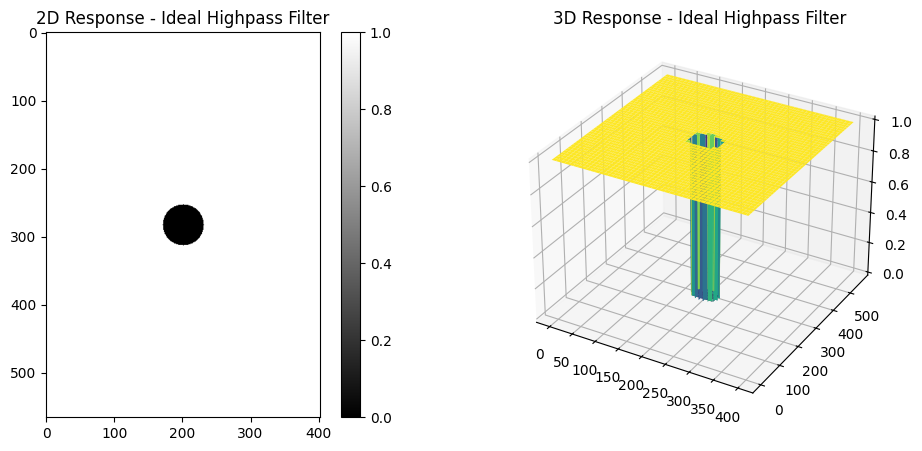

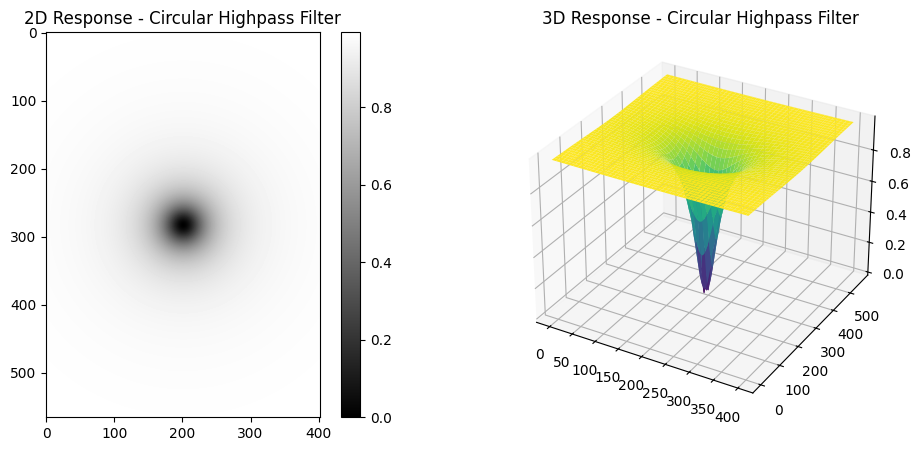

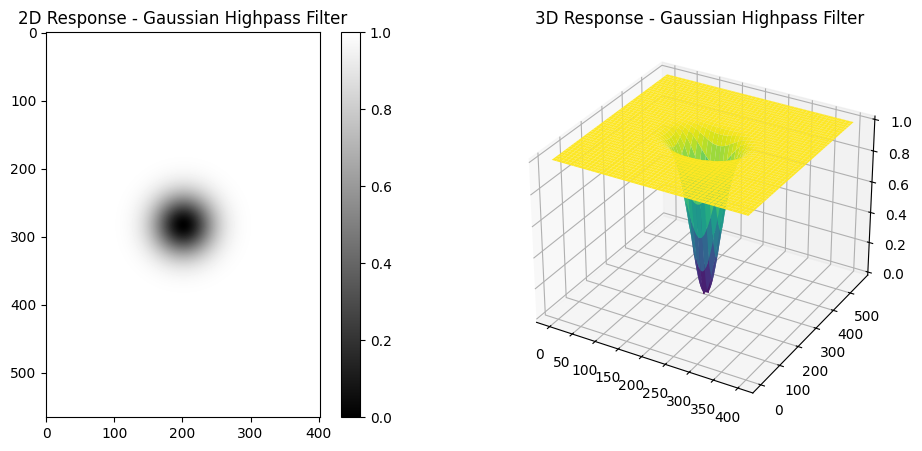

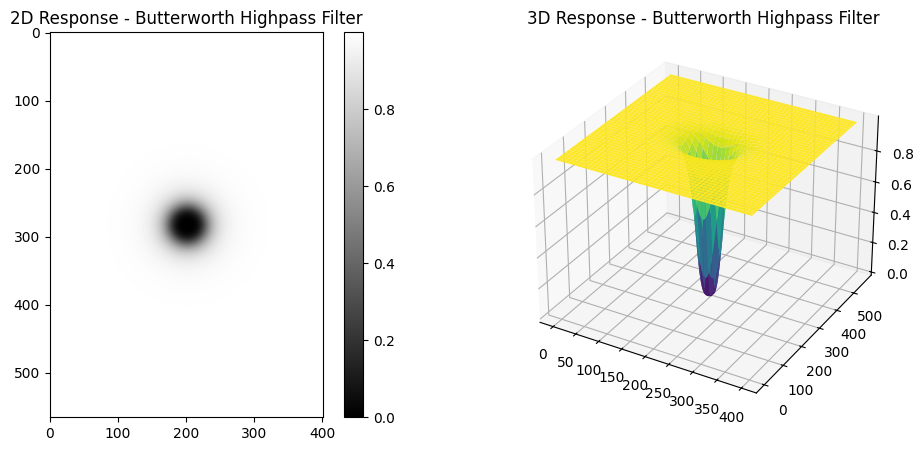

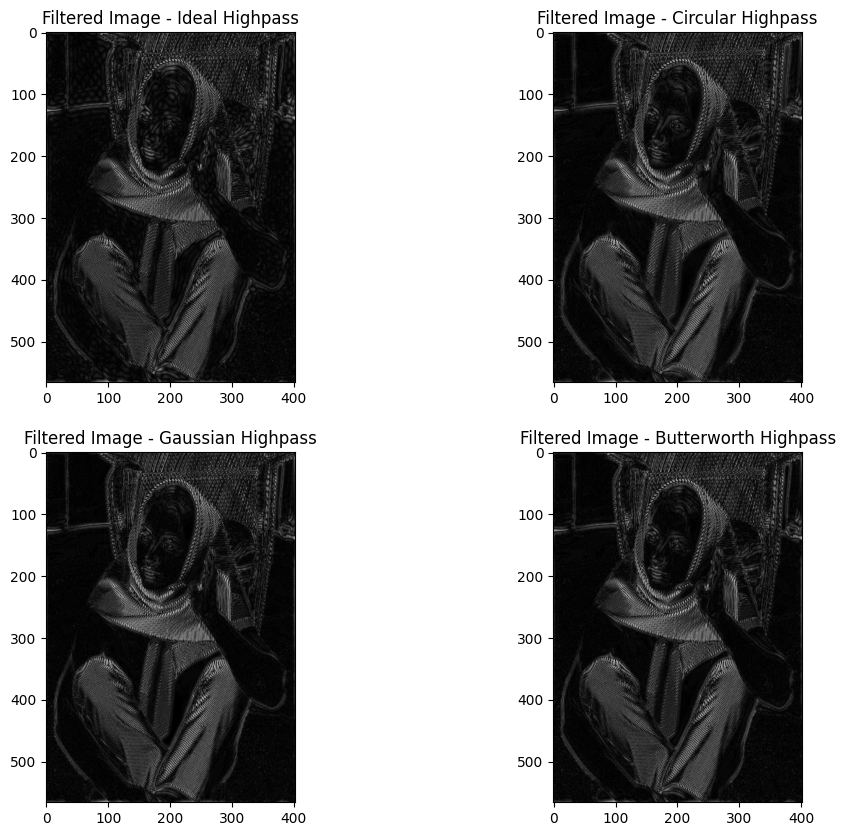

In [16]:
import cv2
import matplotlib.pyplot as plt

def main():
    # Đường dẫn đến file ảnh đã tải lên
    image_path = '/content/Fig0417(a)(barbara).png'

    # Đọc ảnh ở chế độ grayscale
    image = cv2.imread(image_path, 0)
    if image is None:
        print("Error: Could not load image. Please check the file path.")
        return

    image_size = image.shape
    cutoff_frequency = 30

    # Khởi tạo các bộ lọc thông cao
    ideal_filter = ideal_highpass_filter(image_size, cutoff_frequency)
    circular_filter = circular_highpass_filter(image_size, cutoff_frequency)
    gaussian_filter = gaussian_highpass_filter(image_size, cutoff_frequency)
    butterworth_filter = butterworth_highpass_filter(image_size, cutoff_frequency)

    # Hiển thị đáp ứng của các bộ lọc
    plot_filter_response(ideal_filter, 'Ideal Highpass Filter')
    plot_filter_response(circular_filter, 'Circular Highpass Filter')
    plot_filter_response(gaussian_filter, 'Gaussian Highpass Filter')
    plot_filter_response(butterworth_filter, 'Butterworth Highpass Filter')

    # Lọc ảnh với các bộ lọc
    filtered_image_ideal = apply_filter(image, ideal_filter)
    filtered_image_circular = apply_filter(image, circular_filter)
    filtered_image_gaussian = apply_filter(image, gaussian_filter)
    filtered_image_butterworth = apply_filter(image, butterworth_filter)

    # Hiển thị kết quả
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(filtered_image_ideal, cmap='gray')
    plt.title('Filtered Image - Ideal Highpass')

    plt.subplot(2, 2, 2)
    plt.imshow(filtered_image_circular, cmap='gray')
    plt.title('Filtered Image - Circular Highpass')

    plt.subplot(2, 2, 3)
    plt.imshow(filtered_image_gaussian, cmap='gray')
    plt.title('Filtered Image - Gaussian Highpass')

    plt.subplot(2, 2, 4)
    plt.imshow(filtered_image_butterworth, cmap='gray')
    plt.title('Filtered Image - Butterworth Highpass')

    plt.show()

# Chạy chương trình
if __name__ == "__main__":
    main()


BỘ LỌC NOTCH FILTER


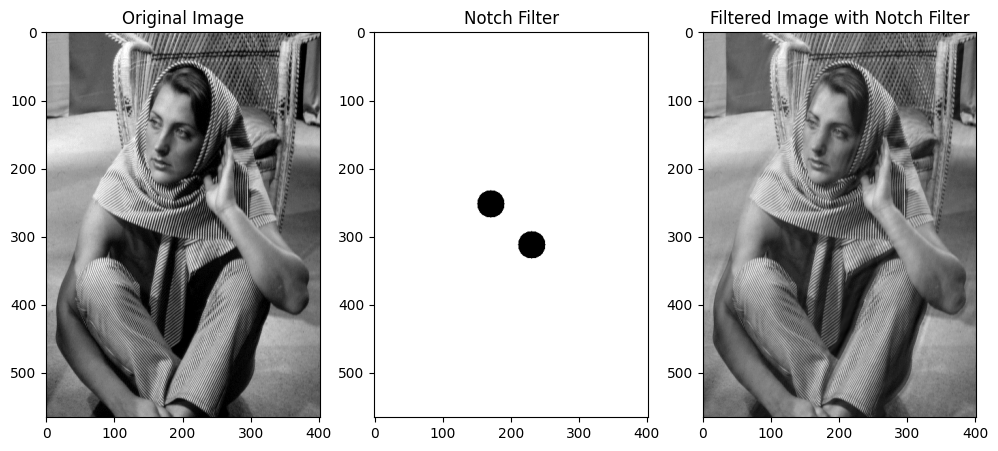

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def notch_filter(size, cutoff, locations, filter_type='reject'):
    """
    Tạo một bộ lọc notch filter cho ảnh trong miền tần số.

    Parameters:
        size (tuple): Kích thước của bộ lọc (rows, cols).
        cutoff (float): Bán kính ảnh hưởng của notch.
        locations (list): Danh sách các vị trí trung tâm của notch [(x1, y1), (x2, y2), ...].
        filter_type (str): Loại bộ lọc - 'reject' để loại bỏ tần số và 'pass' để giữ lại tần số.

    Returns:
        filter_matrix (ndarray): Bộ lọc notch matrix.
    """
    rows, cols = size
    center = (int(rows / 2), int(cols / 2))
    filter_matrix = np.ones((rows, cols), dtype=np.float32)

    for (x, y) in locations:
        for i in range(rows):
            for j in range(cols):
                distance_pos = np.sqrt((i - (center[0] + x)) ** 2 + (j - (center[1] + y)) ** 2)
                distance_neg = np.sqrt((i - (center[0] - x)) ** 2 + (j - (center[1] - y)) ** 2)

                if filter_type == 'reject':  # Loại bỏ các tần số xung quanh các vị trí notch
                    if distance_pos <= cutoff or distance_neg <= cutoff:
                        filter_matrix[i, j] = 0
                elif filter_type == 'pass':  # Chỉ giữ lại các tần số xung quanh các vị trí notch
                    if distance_pos <= cutoff or distance_neg <= cutoff:
                        filter_matrix[i, j] = 1
                    else:
                        filter_matrix[i, j] = 0

    return filter_matrix

def apply_notch_filter(image, filter_matrix):
    """
    Áp dụng bộ lọc notch lên ảnh trong miền tần số.

    Parameters:
        image (ndarray): Ảnh đầu vào.
        filter_matrix (ndarray): Bộ lọc notch.

    Returns:
        filtered_image (ndarray): Ảnh sau khi áp dụng bộ lọc notch.
    """
    # Chuyển đổi ảnh sang miền tần số
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Áp dụng bộ lọc notch
    filtered_dft = dft_shift * filter_matrix

    # Chuyển ngược lại miền không gian
    inverse_dft = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(inverse_dft)
    return np.abs(filtered_image)

# Ví dụ sử dụng Notch Filter
def main():
    # Đường dẫn ảnh
    image_path = '/content/Fig0417(a)(barbara).png'

    # Đọc ảnh ở chế độ grayscale
    image = cv2.imread(image_path, 0)
    if image is None:
        print("Error: Could not load image. Please check the file path.")
        return

    image_size = image.shape

    # Thiết lập các vị trí notch và bán kính
    cutoff = 20
    notch_locations = [(30, 30), (-30, -30)]  # Danh sách các vị trí notch (x, y) trong miền tần số

    # Tạo bộ lọc notch (loại bỏ các tần số tại các vị trí notch)
    notch_filter_matrix = notch_filter(image_size, cutoff, notch_locations, filter_type='reject')

    # Áp dụng bộ lọc notch lên ảnh
    filtered_image = apply_notch_filter(image, notch_filter_matrix)

    # Hiển thị kết quả
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(notch_filter_matrix, cmap='gray')
    plt.title('Notch Filter')

    plt.subplot(1, 3, 3)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered Image with Notch Filter')

    plt.show()

# Chạy chương trình
if __name__ == "__main__":
    main()
